In [1]:
import numpy as np # 1 
import pandas as pd # 2 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math 
import random


In [2]:
cabecalho = ['coluna 1', 'coluna 2']
dataset = pd.read_csv("cluster.dat", decimal=".", sep=' ', names=cabecalho)
dataset

,coluna 1,coluna 2
0,1555.0,28.65
1,1490.0,27.55
2,1445.0,28.35
3,1415.0,28.80
4,1375.0,28.05
...,...,...
568,3420.0,27.95
569,3465.0,26.85
570,3525.0,26.00
571,3570.0,26.15


In [3]:
class KmeansTeste:
  def __init__(self, k):
    self.k = k

  def __distancia (self,v1,v2):
    sum = 0
    for i in range(len(v1)):
      sum += pow(v1[i] - v2[i],2)
    return math.sqrt(sum)

  def __calcCluster(self,data, centroides,k):
    ret = np.zeros(len(data))
    A = 0
    for i in range(len(data)):
      dMin = self.__distancia(data.iloc[i,:], centroides[0])
      ret[i] = 0
      for j in range(1, k):
        d = self.__distancia(data.iloc[i,:], centroides[j])
        if d < dMin:
          dMin = d
          ret[i] = j
    return ret
  def __atualizarCentroides(self,k,cluster,data,centroides):
    media = np.zeros((k,2, data.shape[1]))
    for i in range(len(cluster)):
      for j in range(data.shape[1]):
        media[int(cluster[i])][j][0] += data.iloc[i,j]
        media[int(cluster[i])][j][1] += 1
    for i in range(k):
      for j in range(data.shape[1]):
        centroides[i][j] = media[i][j][0] / media[i][j][1]
    return centroides 
  def __normalizar(self, data, updatePreNorm = False):
    if updatePreNorm:
      self.preNorm = np.asarray([])
    for i in range(data.shape[1]):
      if updatePreNorm:
        self.preNorm = np.append(self.preNorm,np.linalg.norm(data.iloc[:,i]))
      data.iloc[:,i] /= np.linalg.norm(data.iloc[:,i])
    return data
  def fit(self, data):
    self.data = self.__normalizar(data.copy(), True)
    self.__getIniCentroides()
    #self.centroides = np.zeros((self.k,self.data.shape[1]))
    #for i in range(self.k):
    #  for j in range(self.data.shape[1]):
    #    centroideRand = random.randint(0,len(self.data))
    #    self.centroides[i][j] = self.data.iloc[centroideRand,j]

    C = self.__calcCluster(self.data,self.centroides,self.k)
    continua = True
    while(continua):
      centroidesN = self.__atualizarCentroides(self.k,C,self.data, self.centroides)
      continua = False
      for i in range(self.k):
        for j in range(self.data.shape[1]):
          if self.centroides[i][j] != centroidesN[i][j]:
            continua = True
      self.centroides = centroidesN
      C = self.__calcCluster(self.data,self.centroides,self.k)
      
  def predict(self,data):
    return self.__calcCluster(self.__normalizar(data.copy()), self.centroides,self.k)

  
  def __getIniCentroides(self):
    l,c = self.data.shape

    #Primeiro centroide
    np.random.seed(0)
    self.centroides = np.zeros((self.k, c))
    self.centroides[0] = self.data.iloc[np.random.choice(l),:]
    distancia_para_centroide = np.zeros(l)
    
    for i in range(l):
      distancia_para_centroide[i] = self.__distancia(self.centroides[0], self.data.iloc[i,:])
    for i in range(1,self.k):
      # A ideia é colocar os centroides distantes
      # Calculando a prob dos outros cluster (1..k)
      prob = distancia_para_centroide ** 2
      index = np.random.choice(l,size=1, p=prob/np.sum(prob))
      self.centroides[i] = self.data.iloc[index,:]
      distancia_nova = np.zeros(l)
      for j in range(l):
        distancia_nova[j] = self.__distancia(self.centroides[i], self.data.iloc[j,:])
        distancia_para_centroide[j] = np.min((distancia_para_centroide[j], distancia_nova[j]))

In [4]:
k = 3
km = KmeansTeste(k)
km.fit(dataset)

X_cl = km.predict(dataset)

In [5]:
X_cl

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [6]:
dicionarioCores = {0 : 'red', 1 : 'blue', 2: 'green', 3: 'pink', 4: 'yellow'}
label_color = [dicionarioCores[l] for l in X_cl]

In [7]:
c1 = 0
c2 = 1
labels = ['x', 'y']
c1label = labels[c1]
c2label = labels[c2]
title = c1label + ' x ' + c2label

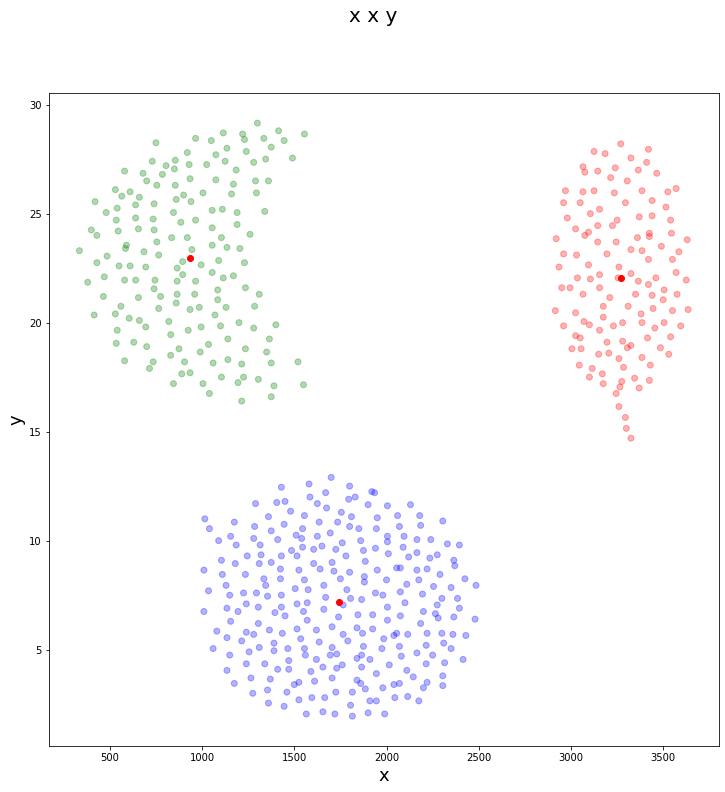

In [8]:
plt.figure(figsize = (12,12))
plt.scatter(dataset.iloc[:,c1],dataset.iloc[:, c2], c=label_color, alpha=0.3) 
#plt.scatter(dataset.iloc[0,c1],dataset.iloc[0, c2], c=['blue']) 
plt.xlabel(c1label, fontsize=18)
plt.ylabel(c2label, fontsize=18)
plt.suptitle(title, fontsize=20)
for i in range(k):
  plt.plot(km.centroides[i][0]*km.preNorm[0],km.centroides[i][1]*km.preNorm[1],"or")
plt.savefig(title + '.jpg')
plt.show()
  